In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
#Dataframe containing ips of high schools in france
ips_df = pd.read_csv("../data/ips.csv", delimiter=";", dtype={"Code departement": str})
#Taking only values we need for map, therefore excluding overseas territories
ips_df = ips_df[ips_df["Code du département"] < 100]

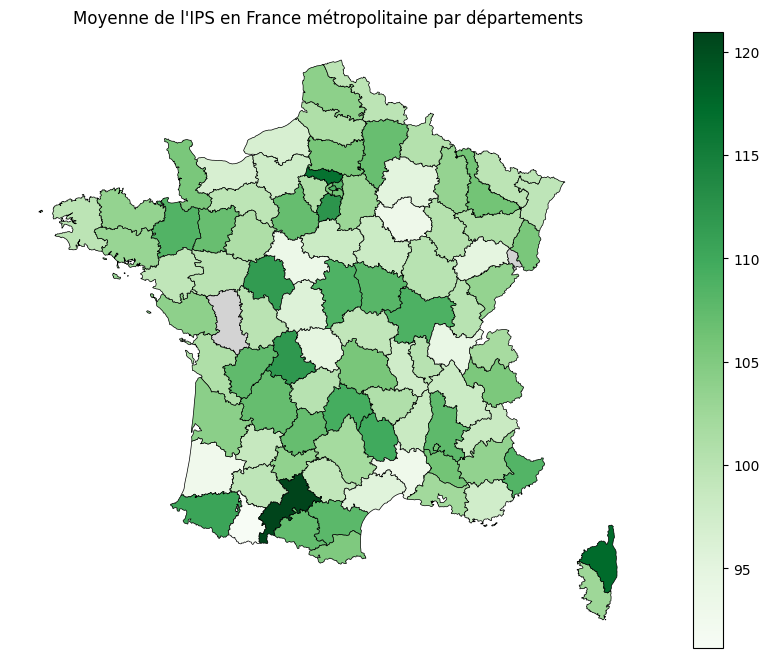

In [17]:
#Loading geojson file
france_departments = gpd.read_file("../data/departements.geojson")
#Calculate the mean of the IPS by departement
df_ips_dep = ips_df.groupby('Code du département')['IPS Ensemble GT-PRO'].mean().reset_index()

#Merge data to plot map easily
#Facilitating merge by ensuring all data is object type
df_ips_dep["Code du département"] = df_ips_dep["Code du département"].apply(str)
merged = france_departments.merge(df_ips_dep, left_on='code', right_on='Code du département', how='left')
#Brute force fixing missing data
merged["IPS Ensemble GT-PRO"] = df_ips_dep["IPS Ensemble GT-PRO"] 

#Creating plot
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='IPS Ensemble GT-PRO', cmap='Greens', linewidth=0.5, ax=ax, edgecolor='black', legend=True, missing_kwds={'color': 'lightgrey'})
ax.axis('off')
ax.set_title("Moyenne de l'IPS en France métropolitaine par départements")
plt.show()